<a href="https://colab.research.google.com/github/ArtuomMerkulov/ArtuomMerkulov/blob/main/%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80_%D1%86%D0%B8%D1%82%D0%B0%D1%82_%D0%B4%D1%80%D0%B5%D0%B2%D0%BD%D0%B5%D0%B3%D1%80%D0%B5%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85_%D1%84%D0%B8%D0%BB%D0%BE%D1%81%D0%BE%D1%84%D0%BE%D0%B2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from keras.utils import np_utils

In [2]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename = "/content/drive/MyDrive/Numpy/philosophy_dataset.txt"
raw_text = open(filename).read()
raw_text = raw_text.lower()

In [4]:
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
print(char_to_int)

{'\n': 0, '\x0c': 1, ' ': 2, '!': 3, '(': 4, ')': 5, ',': 6, '-': 7, '.': 8, ':': 9, ';': 10, '?': 11, 'c': 12, '«': 13, '»': 14, 'а': 15, 'б': 16, 'в': 17, 'г': 18, 'д': 19, 'е': 20, 'ж': 21, 'з': 22, 'и': 23, 'й': 24, 'к': 25, 'л': 26, 'м': 27, 'н': 28, 'о': 29, 'п': 30, 'р': 31, 'с': 32, 'т': 33, 'у': 34, 'ф': 35, 'х': 36, 'ц': 37, 'ч': 38, 'ш': 39, 'щ': 40, 'ъ': 41, 'ы': 42, 'ь': 43, 'э': 44, 'ю': 45, 'я': 46, 'ё': 47, '–': 48, '—': 49, '…': 50}


In [5]:
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters:  21016
Total Vocab:  51


In [6]:
seq_length = 1000
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Patterns:  20016


In [7]:
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

In [8]:
model = Sequential()
model.add(LSTM(512, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
#model.add(LSTM(256))
#model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [9]:
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [10]:
x = model.fit(X, y, epochs=90, batch_size=256, callbacks=callbacks_list)

Epoch 1/90
79/79 [==============================] - ETA: 0s - loss: 3.2768
Epoch 1: loss improved from inf to 3.27679, saving model to weights-improvement-01-3.2768.hdf5
79/79 [==============================] - 49s 538ms/step - loss: 3.2768
Epoch 2/90
79/79 [==============================] - ETA: 0s - loss: 3.2113
Epoch 2: loss improved from 3.27679 to 3.21130, saving model to weights-improvement-02-3.2113.hdf5
79/79 [==============================] - 43s 547ms/step - loss: 3.2113
Epoch 3/90
79/79 [==============================] - ETA: 0s - loss: 3.2081
Epoch 3: loss improved from 3.21130 to 3.20809, saving model to weights-improvement-03-3.2081.hdf5
79/79 [==============================] - 42s 536ms/step - loss: 3.2081
Epoch 4/90
79/79 [==============================] - ETA: 0s - loss: 3.2041
Epoch 4: loss improved from 3.20809 to 3.20414, saving model to weights-improvement-04-3.2041.hdf5
79/79 [==============================] - 43s 540ms/step - loss: 3.2041
Epoch 5/90
79/79 [======

In [11]:
history = x

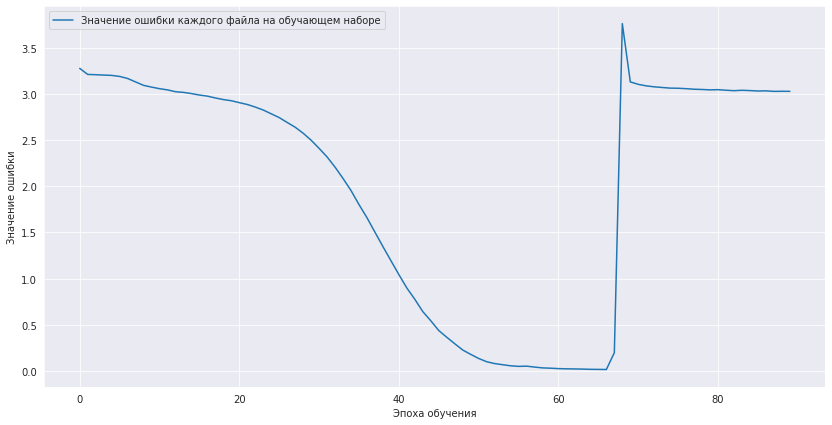

In [12]:
plt.figure(figsize = (14, 7))
plt.plot(history.history['loss'], label='Значение ошибки каждого файла на обучающем наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()
plt.show()

In [13]:
# load the network weights
filename = "weights-improvement-67-0.0159.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [14]:
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [15]:
import sys

In [17]:
start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Read:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
for i in range(1000):
	x = numpy.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print("\nDone.")

Read:
" го человечности.
как мы можем знать, что такое смерть, когда мы не знаем еще, что такое жизнь?
когда вам покажется, что цель недостижима, не изменяйте цель — изменяйте свой план действий.
когда государство управляется согласно с разумом, постыдны бедность и нужда; когда государство не
управляется согласно с разумом, то постыдны богатства и почести.
когда не знаешь слов, нечем познавать людей.
когда пути неодинаковы, не составляют вместе планов.
когда тебе плохо — прислушайся к природе. тишина мира успокаивает лучше, чем миллионы ненужных
слов.
красота есть во всем, но не всем дано это видеть.
кто повторяет старое и узнает новое, тот может быть предводителем.
легко быть богатым и не кичиться этим; трудно быть бедным и не сетовать.
легче зажечь одну маленькую свечу, чем клясть темноту.
лишь когда приходят холода, становится ясно, что сосны и кипарисы последними теряют свой убор.
любимец деревни — враг добродетели.
люди в древности не любили много говорить. они считали позором для